# Ukraine-Russia War 2022

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Equipment Data

In [14]:
df = pd.read_csv('russia_losses_equipment.csv',parse_dates=['date'])
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     74 non-null     datetime64[ns]
 1   day                      74 non-null     int64         
 2   aircraft                 74 non-null     int64         
 3   helicopter               74 non-null     int64         
 4   tank                     74 non-null     int64         
 5   APC                      74 non-null     int64         
 6   field artillery          74 non-null     int64         
 7   MRL                      74 non-null     int64         
 8   military auto            65 non-null     float64       
 9   fuel tank                65 non-null     float64       
 10  drone                    74 non-null     int64         
 11  naval ship               74 non-null     int64         
 12  anti-aircraft warfare    74 non-null  

In [19]:
# Numerous cells have days without losses recorded as NaN
df.fillna(0,inplace=True)
df.isnull().sum()

date                       0
day                        0
aircraft                   0
helicopter                 0
tank                       0
APC                        0
field artillery            0
MRL                        0
military auto              0
fuel tank                  0
drone                      0
naval ship                 0
anti-aircraft warfare      0
special equipment          0
mobile SRBM system         0
vehicles and fuel tanks    0
cruise missiles            0
dtype: int64

Importing Personnel Data

In [20]:
df2 = pd.read_csv('russia_losses_personnel.csv',parse_dates=['date'])

df2.head()

,date,day,personnel,personnel*,POW
0,2022-02-25,2,2800,about,0
1,2022-02-26,3,4300,about,0
2,2022-02-27,4,4500,about,0
3,2022-02-28,5,5300,about,0
4,2022-03-01,6,5710,about,200


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        74 non-null     datetime64[ns]
 1   day         74 non-null     int64         
 2   personnel   74 non-null     int64         
 3   personnel*  74 non-null     object        
 4   POW         74 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.0+ KB


In [42]:
df3 = df.set_index("date").join(df2.set_index("date"), rsuffix="_p").drop("day_p", axis=1)

In [43]:
df3

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,personnel,personnel*,POW
date,,,,,,,,,,,,,,,,,,,
2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,0.0,0.0,0.0,0.0,2800,about,0
2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,0.0,0.0,0.0,0.0,4300,about,0
2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,0.0,0.0,0.0,0.0,4500,about,0
2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,0.0,0.0,0.0,0.0,5300,about,0
2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,0.0,0.0,0.0,0.0,5710,about,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-05,71,196,155,1092,2651,499,169,0.0,0.0,312,10,83,38.0,0.0,1907.0,89.0,24700,about,496
2022-05-06,72,199,155,1110,2686,502,171,0.0,0.0,324,11,83,38.0,0.0,1926.0,90.0,24900,about,496
2022-05-07,73,199,155,1122,2713,509,172,0.0,0.0,341,11,84,38.0,0.0,1934.0,90.0,25100,about,496


<AxesSubplot:xlabel='APC', ylabel='personnel'>

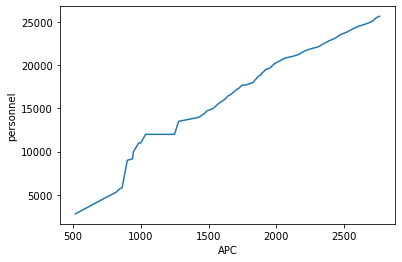

In [67]:
sns.lineplot(data=df3, y="personnel", x="APC")

<AxesSubplot:>

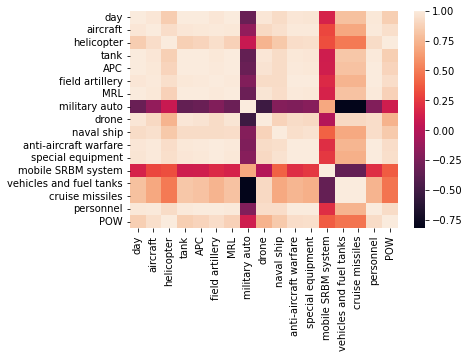

In [89]:
# print(df3.groupby("personnel").mean().corr())
sns.heatmap(df3.groupby("fuel tank").mean().corr())

In [91]:
sns.heatmap(df3.drop("personnel*", axis=1))

IndexError: Inconsistent shape between the condition and the input (got (18, 1) and (18,))

<AxesSubplot:xlabel='date'>

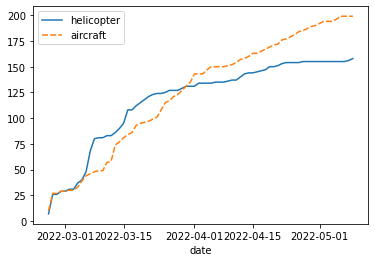

In [76]:
sns.lineplot(data=df3[["helicopter", "aircraft"]])

In [99]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2022-02-25 to 2022-05-09
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      74 non-null     int64  
 1   aircraft                 74 non-null     int64  
 2   helicopter               74 non-null     int64  
 3   tank                     74 non-null     int64  
 4   APC                      74 non-null     int64  
 5   field artillery          74 non-null     int64  
 6   MRL                      74 non-null     int64  
 7   military auto            74 non-null     float64
 8   fuel tank                74 non-null     float64
 9   drone                    74 non-null     int64  
 10  naval ship               74 non-null     int64  
 11  anti-aircraft warfare    74 non-null     int64  
 12  special equipment        74 non-null     float64
 13  mobile SRBM system       74 non-null     float64
 14  vehicles

In [142]:
df4 = (df3 - df3.mean(numeric_only=True)).drop("personnel*", axis=1)

In [143]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74 entries, 2022-02-25 to 2022-05-09
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APC                      74 non-null     float64
 1   MRL                      74 non-null     float64
 2   POW                      74 non-null     float64
 3   aircraft                 74 non-null     float64
 4   anti-aircraft warfare    74 non-null     float64
 5   cruise missiles          74 non-null     float64
 6   day                      74 non-null     float64
 7   drone                    74 non-null     float64
 8   field artillery          74 non-null     float64
 9   fuel tank                74 non-null     float64
 10  helicopter               74 non-null     float64
 11  military auto            74 non-null     float64
 12  mobile SRBM system       74 non-null     float64
 13  naval ship               74 non-null     float64
 14  personne

In [145]:
df4.index

DatetimeIndex(['2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
      

<AxesSubplot:>

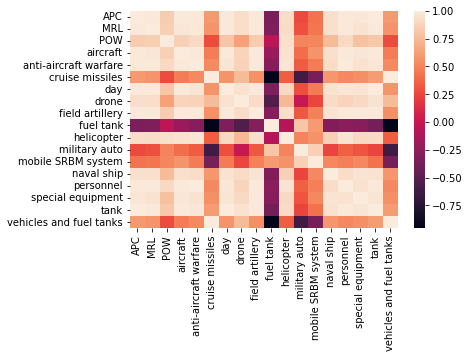

In [152]:
sns.heatmap(data=df4.corr())